Importing Required Libraries 

In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

Importing Dataset 

In [80]:
data = pd.read_csv("train_and_test2.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


checking for useful columns 

In [81]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

Checking if all the values in the columns are non zero , we drop the column if all values are zero 

In [83]:
for i in data.columns:
    if data[f"{i}"].sum()==0:
        data.drop(f"{i}", axis=1, inplace=True)

data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [84]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


Checking for missing values 

In [85]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

filling missing values with mean 

In [86]:
data.fillna(data.Embarked.mean(),inplace=True)
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

In [87]:
data.shape

(1309, 9)

In [88]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


Checking for Outliers and dropping them 

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Fare'>

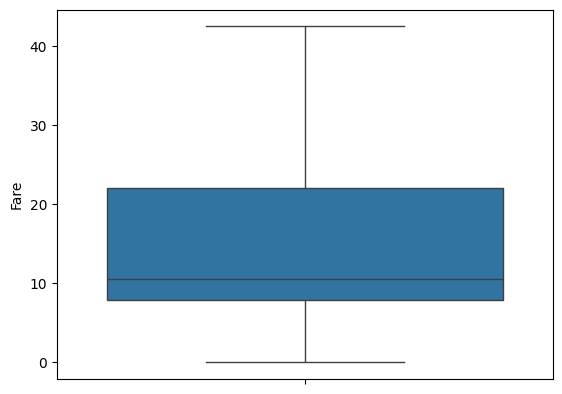

In [89]:
indices = data[(data['Fare']>=45)].index
data.drop(indices, inplace=True)
sns.boxplot(data.Fare)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='sibsp'>

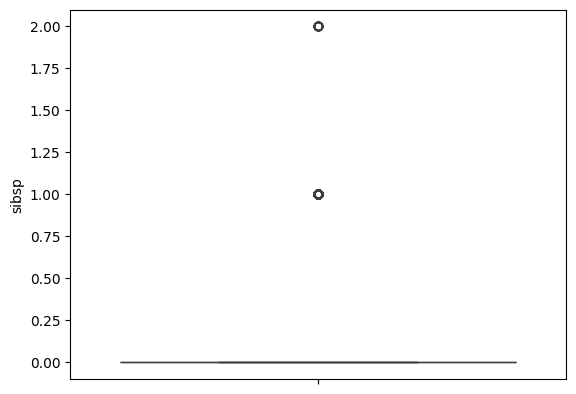

In [90]:
indices = data[(data['sibsp']>=3)].index
data.drop(indices,inplace=True)
sns.boxplot(data.sibsp)

In [91]:
data.Age.describe()

count    1015.000000
mean       28.769212
std        11.761752
min         0.170000
25%        22.000000
50%        28.000000
75%        33.000000
max        80.000000
Name: Age, dtype: float64

checking for unique values in the "Parch" Column

In [92]:
data.Parch.unique()

array([0, 2, 1, 5, 3, 4], dtype=int64)

In [93]:
(data.Parch == 3).sum()

6

Removing Outliers

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Parch'>

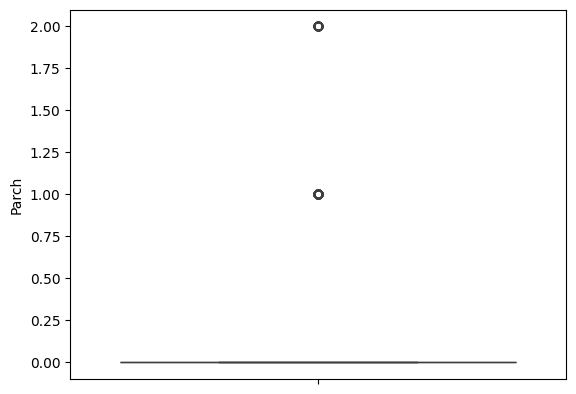

In [94]:
indices=data[(data.Parch>=3)].index
data.drop(indices,inplace=True)
sns.boxplot(data.Parch)

Checking the shape of clean Data 

In [95]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
print('Shape of X ',x.shape,'Shape of Y ',y.shape)

Shape of X  (999, 7) Shape of Y  (999,)


Splitting the dataset into training and testing data for further use  

In [96]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=13)

print("X Train shape",X_train.shape)
print("X Test shape",X_test.shape)
print("y Train shape",y_train.shape)
print("y Test shape",y_test.shape)

X Train shape (799, 7)
X Test shape (200, 7)
y Train shape (799,)
y Test shape (200,)


Logistic Regression 

In [97]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)


Testing Accuracy 

In [98]:
test_acc = accuracy_score(prediction,y_test)*100
train_acc = accuracy_score(model.predict(X_train),y_train)*100

Printing Results 

In [99]:
print ("training Accuracy ", round(train_acc,2),"%")
print ("Testing Accuracy ", round (test_acc,2),"%")


training Accuracy  79.22 %
Testing Accuracy  80.0 %


Trying another model for increasing Accuracy 

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred= model.predict(X_test)
test_acc=accuracy_score(pred,y_test)*100
train_acc = accuracy_score(model.predict(X_train),y_train)*100



Printing Results

In [101]:
print("Training Accuracy :",round(train_acc,2),"%")
print("Testing Accuracy :",round(test_acc,2),"%")


Training Accuracy : 97.37 %
Testing Accuracy : 80.5 %


Confusion Matrix 

Text(50.722222222222214, 0.5, 'Predicted Values')

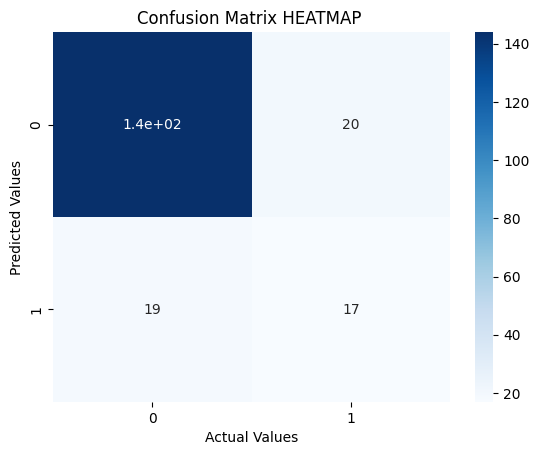

In [102]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True,cmap= "Blues")
plt.title("Confusion Matrix HEATMAP ")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [103]:
print ("Classification Report ")
print (classification_report(pred,y_test))

Classification Report 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       164
           1       0.46      0.47      0.47        36

    accuracy                           0.81       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.81      0.81      0.81       200

